In [1]:
from sklearn.datasets import make_moons
import numpy as np

def add_noise(X, noise_level=0.1):
    noise = np.random.normal(0, noise_level, X.shape)
    X_noisy = X + noise
    # Agregar una tercera columna de ruido
    third_col = np.random.normal(0, noise_level, (X.shape[0], 1))
    X_noisy_3d = np.hstack([X_noisy, third_col])
    return X_noisy_3d

X, y = make_moons(n_samples=300, noise=0.1, random_state=42)
X_noisy = add_noise(X, noise_level=0.5)

In [2]:
print(X_noisy.shape)

(300, 3)


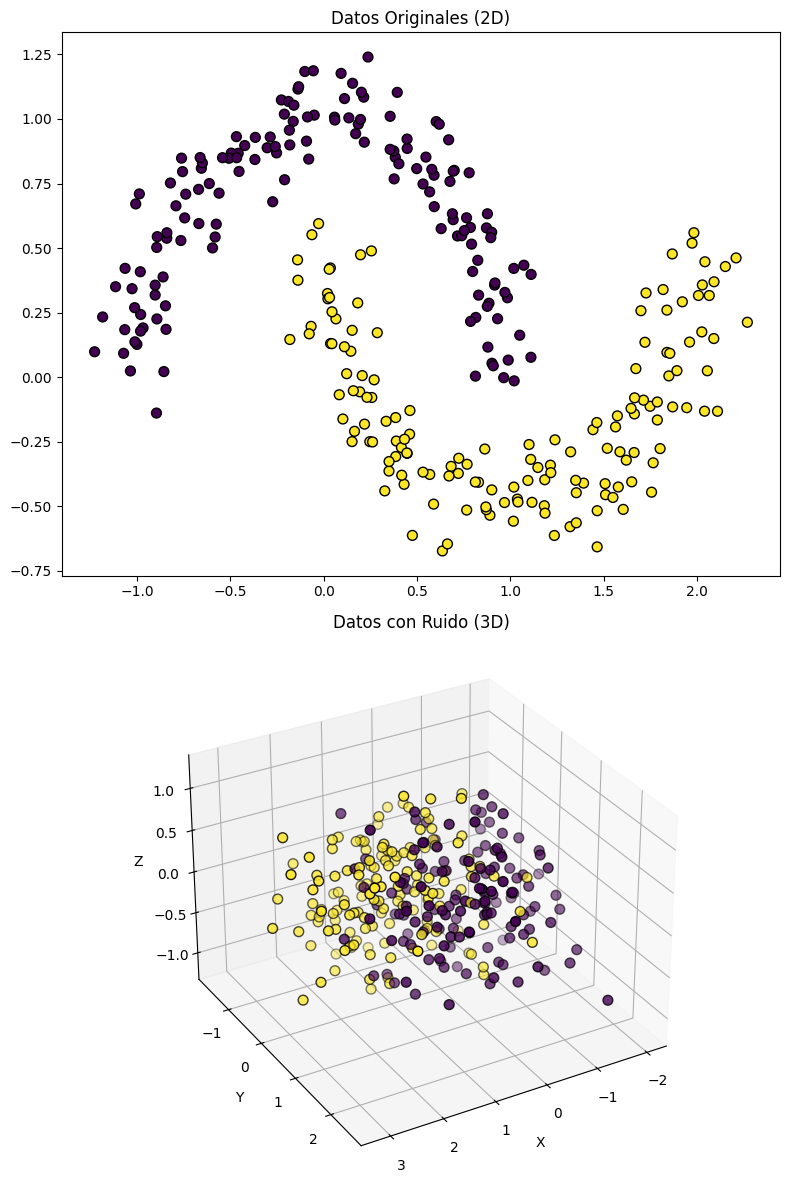

In [3]:
import matplotlib.pyplot as plt

# Crear figura y ejes
fig = plt.figure(figsize=(8, 12))

# Subplot 2D (datos originales)
ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
ax1.set_title('Datos Originales (2D)')

# Subplot 3D (datos con ruido)
ax2 = fig.add_subplot(2, 1, 2, projection='3d')
ax2.scatter(X_noisy[:, 0], X_noisy[:, 1], X_noisy[:, 2], c=y, cmap='viridis', edgecolor='k', s=50)
ax2.set_title('Datos con Ruido (3D)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(elev=30, azim=60) 
plt.tight_layout()
plt.show()

In [4]:
#guardar los datos en un archivo CSV
import pandas as pd
df = pd.DataFrame(X_noisy, columns=['X1', 'X2', 'X3'])
df['label'] = y
df.to_csv('../data/moon_noisy.csv', index=False)
# Guardar los datos originales en un archivo CSV
df_original = pd.DataFrame(X, columns=['X1', 'X2'])
df_original['label'] = y
df_original.to_csv('../data/moon.csv', index=False)